In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load verification trajectory
nasa_std = pd.read_csv('../cases/NASA STCA Standard/trajectory/Trajectory_to.csv')

pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = "engine_deck_stca.csv"
pyna_settings.TS_cutback = 1.
pyna_settings.z_cutback = 1000.
pyna_settings.theta_flaps = 0.

In [3]:
# py = pyna(pyna_settings)
# py.compute_trajectory()

In [4]:
# Run trajectories
n_flaps = 14
theta_flaps_lst = np.linspace(0, 26, n_flaps)

converged = np.ones(n_flaps)
py = dict()
for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    py[str(i)] = pyna(pyna_settings)
    converged[i] = py[str(i)].compute_trajectory()

clear_output()

In [5]:
# Analyze the trajectories 
n_flaps = 14
theta_flaps_lst = np.linspace(0, 26, n_flaps)
x_groundroll = np.zeros(n_flaps)
cl_groundroll = np.zeros(n_flaps)
cd_groundroll = np.zeros(n_flaps)

v_rotation = np.zeros(n_flaps)
x_rotation = np.zeros(n_flaps)

x_climb = np.zeros(n_flaps)
gamma_climb = np.zeros(n_flaps)
F_n_climb = np.zeros(n_flaps)
v_climb = np.zeros(n_flaps)
alpha_climb = np.zeros(n_flaps)
c_l_climb = np.zeros(n_flaps)
c_d_climb = np.zeros(n_flaps)
D_climb = np.zeros(n_flaps)
L_climb = np.zeros(n_flaps)
vdot_climb = np.zeros(n_flaps)
gammadot_climb = np.zeros(n_flaps)

for i, _ in enumerate(theta_flaps_lst):
    if converged[i]:
        x_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
        cl_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.c_l')[-1]
        cd_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.c_d')[-1]

        x_rotation[i] = py[str(i)].problem.get_val('phases.rotation.interpolated.states:x')[-1] - py[str(i)].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
        v_rotation[i] = py[str(i)].ac.v_rot
    
        x_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:x')[-1] - py[str(i)].problem.get_val('phases.rotation.interpolated.states:x')[-1]
        gamma_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:gamma')[-1]
        alpha_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.controls:alpha')[-1]
        F_n_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.F_n')[-1]
        v_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:v')[-1]
        c_l_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.c_l')[-1]
        c_d_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.c_d')[-1]
        D_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.D')[-1]
        L_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.L')[-1]
        vdot_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.state_rates:v')[-1]
        gammadot_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.state_rates:gamma')[-1]
        
# x_total = x_groundroll + x_rotation + x_climb

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,4))
plt.style.use('../utils/plot.mplstyle')
ax[0].plot(theta_flaps_lst, x_groundroll, '-o', label='groundroll')
ax[0].plot(theta_flaps_lst, x_rotation, '-o', label='rotation')
ax[0].plot(theta_flaps_lst, x_climb, '-o', label='climb')
ax[0].plot(theta_flaps_lst, x_vnrs, '-o', label='vnrs')

# ax[0].plot(theta_flaps_lst, x_total/x_total[0], 'k--', label='total')

ax[0].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[0].set_ylabel(r'$x/x_{no\ flaps}$')
ax[0].legend(fontsize=14, loc='lower left', bbox_to_anchor=(0.0, 1.0), ncol=1, borderaxespad=0, frameon=False)
ax[0].set_ylim([-0.05*np.max(x_vnrs),1.05*np.max(x_vnrs)])

plt.subplots_adjust(wspace=0.4)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,4))
plt.style.use('../utils/plot.mplstyle')
ax[0].plot(theta_flaps_lst, x_groundroll, '-o', label='groundroll')
ax[0].plot(theta_flaps_lst, x_rotation, '-o', label='rotation')
ax[0].plot(theta_flaps_lst, x_climb, '-o', label='climb')
ax[0].plot(theta_flaps_lst, x_vnrs, '-o', label='vnrs')

ax[0].plot(theta_flaps_lst, x_total, 'k--', label='total')

ax[0].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[0].set_ylabel(r'$x/x_{no\ flaps}$')
ax[0].legend(fontsize=14, loc='lower left', bbox_to_anchor=(0.0, 1.0), ncol=1, borderaxespad=0, frameon=False)
# ax[0].set_ylim([0.8,1.5])

plt.subplots_adjust(wspace=0.4)

In [ ]:
# Iterate through flap settings
n_flaps = 14
theta_flaps_lst = np.linspace(0, 26, n_flaps)
x_groundroll = np.zeros(n_flaps)
x_rotation = np.zeros(n_flaps)
x_climb = np.zeros(n_flaps)
cd_groundroll = np.zeros(n_flaps)
cl_groundroll = np.zeros(n_flaps)
v_rotation = np.zeros(n_flaps)


for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    py = pyna(pyna_settings)
    py.compute_trajectory()
    x_groundroll[i] = py.problem.get_val('phases.groundroll.interpolated.states:x')[-1]
    x_rotation[i] = py.problem.get_val('phases.rotation.interpolated.states:x')[-1] - py.problem.get_val('phases.groundroll.interpolated.states:x')[-1]
    x_climb[i] = py.problem.get_val('phases.climb.interpolated.states:x')[-1] - py.problem.get_val('phases.rotation.interpolated.states:x')[-1]

    cl_groundroll[i] = py.problem.get_val('trajectory.c_l')[-1]
    cd_groundroll[i] = py.problem.get_val('trajectory.c_d')[-1]
    v_rotation[i] = py.ac.v_rot
    clear_output()

In [ ]:
plt.plot(theta_flaps_lst, x_climb)

# Climb

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(22,4))
plt.style.use('../utils/plot.mplstyle')
ax[0].plot(theta_flaps_lst, x_groundroll/x_groundroll[0], label='groundroll')
ax[0].plot(theta_flaps_lst, x_rotation/x_rotation[0], label='rotation')
ax[0].plot(theta_flaps_lst, x_climb/x_climb[0], label='climb')
ax[0].plot(theta_flaps_lst, x_total/x_total[0], '--k', label='total')
ax[0].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[0].set_ylabel(r'$x/x_{no\ flaps}$')
ax[0].legend(fontsize=14, loc='lower left', frameon=False, bbox_to_anchor=(0, 1.0), ncol=2)

term1 = 3*F_n_climb * np.cos((alpha_climb + 1)*np.pi/180) / (55000 * 9.81)
term2 = D_climb / (55000 * 9.81)

# ax[1].plot(theta_flaps_lst, term1)

lala = F_n_climb
lala1= np.cos((alpha_climb + 1)*np.pi/180)

ax[1].plot(theta_flaps_lst, v_climb/v_climb[0])
ax[1].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[1].set_ylabel(r'$v/v_{no\ flaps}$')

ax[2].plot(theta_flaps_lst, v_climb**2*c_d_climb)
ax[2].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[2].set_ylabel(r'$c_{d}v^2/(c_{d}v^2)_{no\ flaps}$')

ax[3].plot(theta_flaps_lst, alpha_climb/alpha_climb[0])
ax[3].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[3].set_ylabel(r'$\alpha/\alpha_{no\ flaps}$')

plt.subplots_adjust(wspace=0.32)

# Rotation

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.style.use('../utils/plot.mplstyle')
ax[0].plot(theta_flaps_lst, x_groundroll/x_groundroll[0], label='groundroll')
ax[0].plot(theta_flaps_lst, x_rotation/x_rotation[0], label='rotation')
ax[0].plot(theta_flaps_lst, x_total/x_total[0], '--k', label='total')
ax[0].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[0].set_ylabel(r'$x/x_{no\ flaps}$')
ax[0].legend(fontsize=14, frameon=False)
ax[1].plot(theta_flaps_lst, cl_groundroll/cl_groundroll[0])
ax[1].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[1].set_ylabel(r'$c_l/c_{l, no\ flaps}$ [-]')
ax[1].plot()
plt.subplots_adjust(wspace=0.4)

# Groundroll 

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


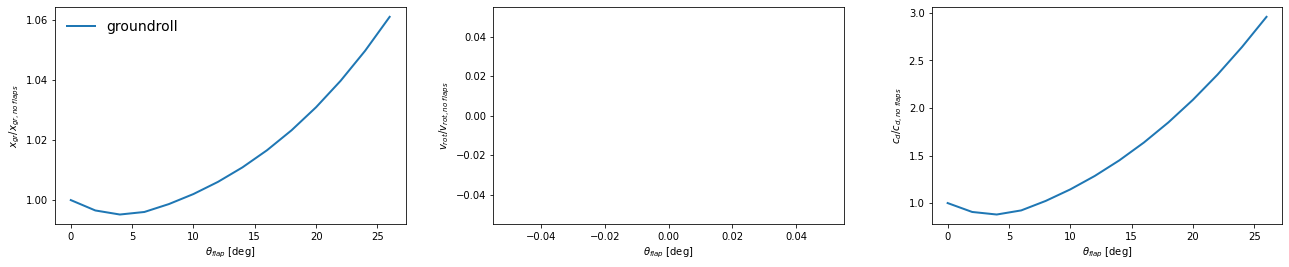

In [7]:
fig, ax = plt.subplots(1,3,figsize=(22,4))
plt.style.use('../utils/plot.mplstyle')
ax[0].plot(theta_flaps_lst, x_groundroll/x_groundroll[0], label='groundroll')
ax[0].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[0].set_ylabel(r'$x_{gr}/x_{gr, no\ flaps}$')
ax[0].legend(fontsize=14, frameon=False)
ax[1].plot(theta_flaps_lst, v_rotation/v_rotation[0])
ax[1].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[1].set_ylabel(r'$v_{rot}/v_{rot, no\ flaps}$')
ax[2].plot(theta_flaps_lst, cd_groundroll/cd_groundroll[0])
ax[2].set_xlabel(r'$\theta_{flap}$ [deg]')
ax[2].set_ylabel(r'$c_d/c_{d, no\ flaps}$')
plt.subplots_adjust(wspace=0.25)

In [ ]:
om.n2(py['0'].problem)

In [ ]:
# Analyze the trajectories 
n_flaps = 14
theta_flaps_lst = np.linspace(0, 26, n_flaps)
x_groundroll = np.zeros(n_flaps)
x_rotation = np.zeros(n_flaps)
x_climb = np.zeros(n_flaps)
cd_groundroll = np.zeros(n_flaps)
cl_groundroll = np.zeros(n_flaps)
v_rotation = np.zeros(n_flaps)
# gamma_climb = np.zeros(n_flaps)
# F_n_climb = np.zeros(n_flaps)
# v_climb = np.zeros(n_flaps)
# alpha_climb = np.zeros(n_flaps)
# c_l_climb = np.zeros(n_flaps)
# c_d_climb = np.zeros(n_flaps)
# D_climb = np.zeros(n_flaps)
# L_climb = np.zeros(n_flaps)
# vdot_climb = np.zeros(n_flaps)
# gammadot_climb = np.zeros(n_flaps)
x_vnrs = np.zeros(n_flaps)

for i, _ in enumerate(theta_flaps_lst):
    x_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
    cl_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.c_l')[-1]
    cd_groundroll[i] = py[str(i)].problem.get_val('phases.groundroll.interpolated.c_d')[-1]

    x_rotation[i] = py[str(i)].problem.get_val('phases.rotation.interpolated.states:x')[-1] - py[str(i)].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
    v_rotation[i] = py[str(i)].ac.v_rot
    
    x_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:x')[-1] - py[str(i)].problem.get_val('phases.rotation.interpolated.states:x')[-1]
#     gamma_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:gamma')[-1]
#     alpha_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.controls:alpha')[-1]
#     F_n_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.F_n')[-1]
#     v_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.states:v')[-1]
#     c_l_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.c_l')[-1]
#     c_d_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.c_d')[-1]
#     D_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.D')[-1]
#     L_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.L')[-1]
#     vdot_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.state_rates:v')[-1]
#     gammadot_climb[i] = py[str(i)].problem.get_val('phases.climb.interpolated.state_rates:gamma')[-1]

    x_vnrs[i] = py[str(i)].problem.get_val('phases.vnrs.interpolated.states:x')[-1] - py[str(i)].problem.get_val('phases.climb.interpolated.states:x')[-1]
    
x_total = x_groundroll + x_rotation + x_climb + x_vnrs